In [1]:
import matplotlib.pyplot as plt
import joblib
import tkinter as tk
from tkinter import ttk
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from tkinter import *
from tkinter import messagebox
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
df = pd.read_csv('Stroke.csv',encoding="latin-1")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
# Điền bằng giá trị trung bình
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Điền bằng median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Điền bằng modus
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)
df.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\1733157614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\1733157614.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [6]:
# Đếm số lần xuất hiện của mỗi giới tính với tình trạng đột quỵ
stroke_counts = df[df['stroke'] == 1].groupby('gender').size()

# In kết quả
print(stroke_counts)

gender
Female    141
Male      108
dtype: int64


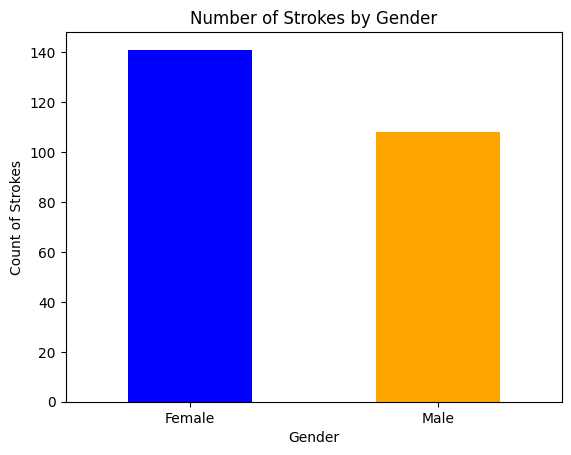

In [7]:
# Vẽ biểu đồ
stroke_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count of Strokes')
plt.title('Number of Strokes by Gender')
plt.xticks(rotation=0)
plt.show()

In [8]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
age_counts = df['age'].value_counts()
# In ra kết quả
print(age_counts)

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64


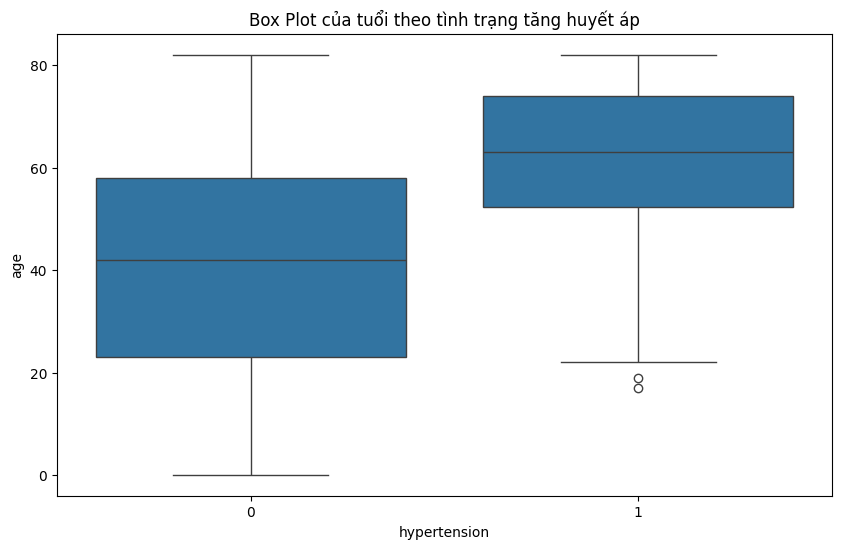

In [10]:
# Biểu đồ hộp (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='age', data=df)
plt.title('Box Plot của tuổi theo tình trạng tăng huyết áp')
plt.show()

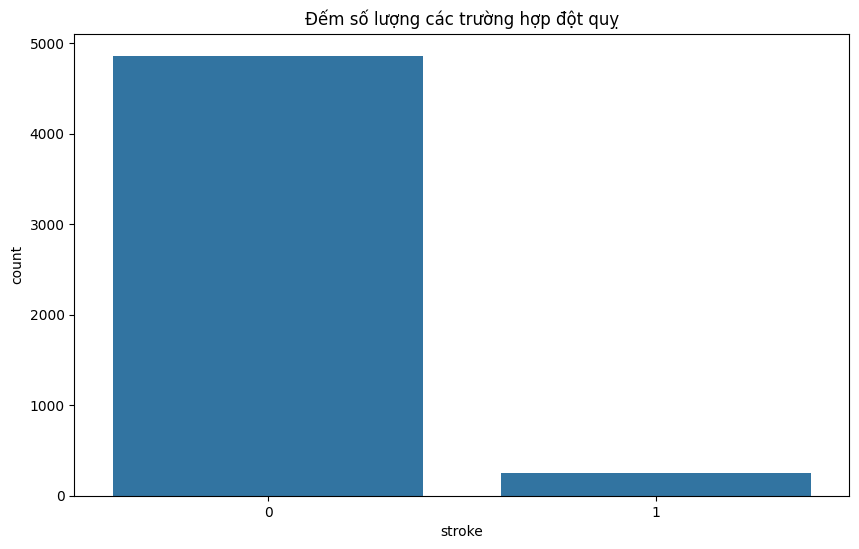

In [11]:
# Biểu đồ đếm (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=df)
plt.title('Đếm số lượng các trường hợp đột quỵ')
plt.show()

<Figure size 2000x1500 with 0 Axes>

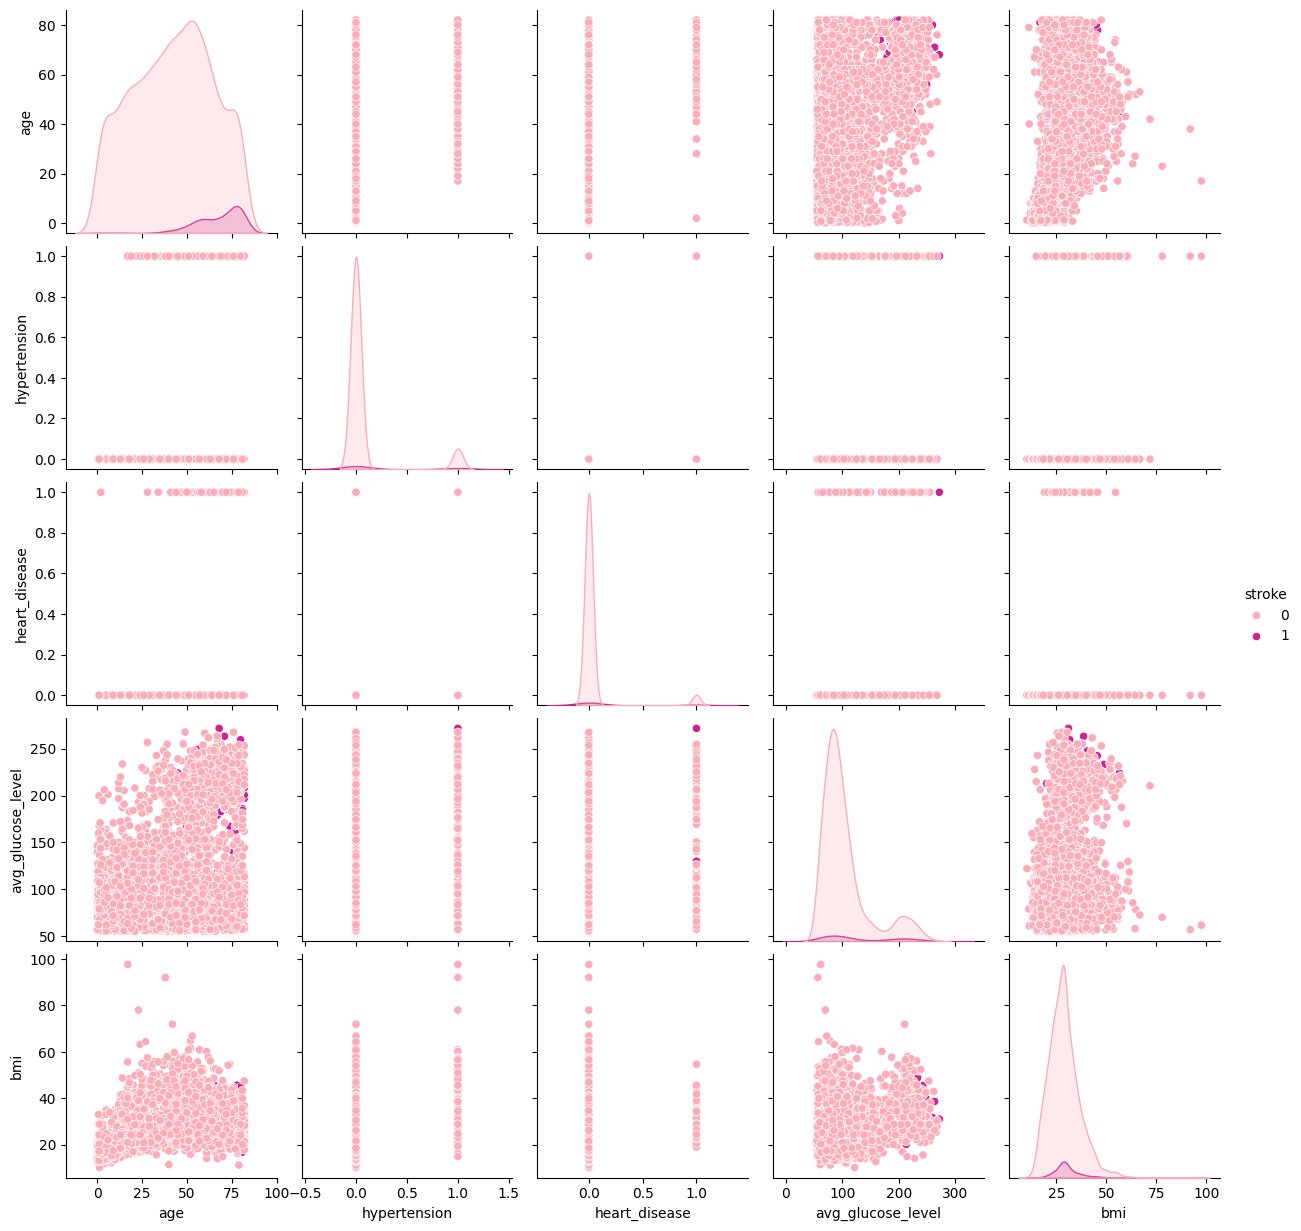

In [12]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='RdPu');

C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\552978326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df, x=i,palette='RdPu')


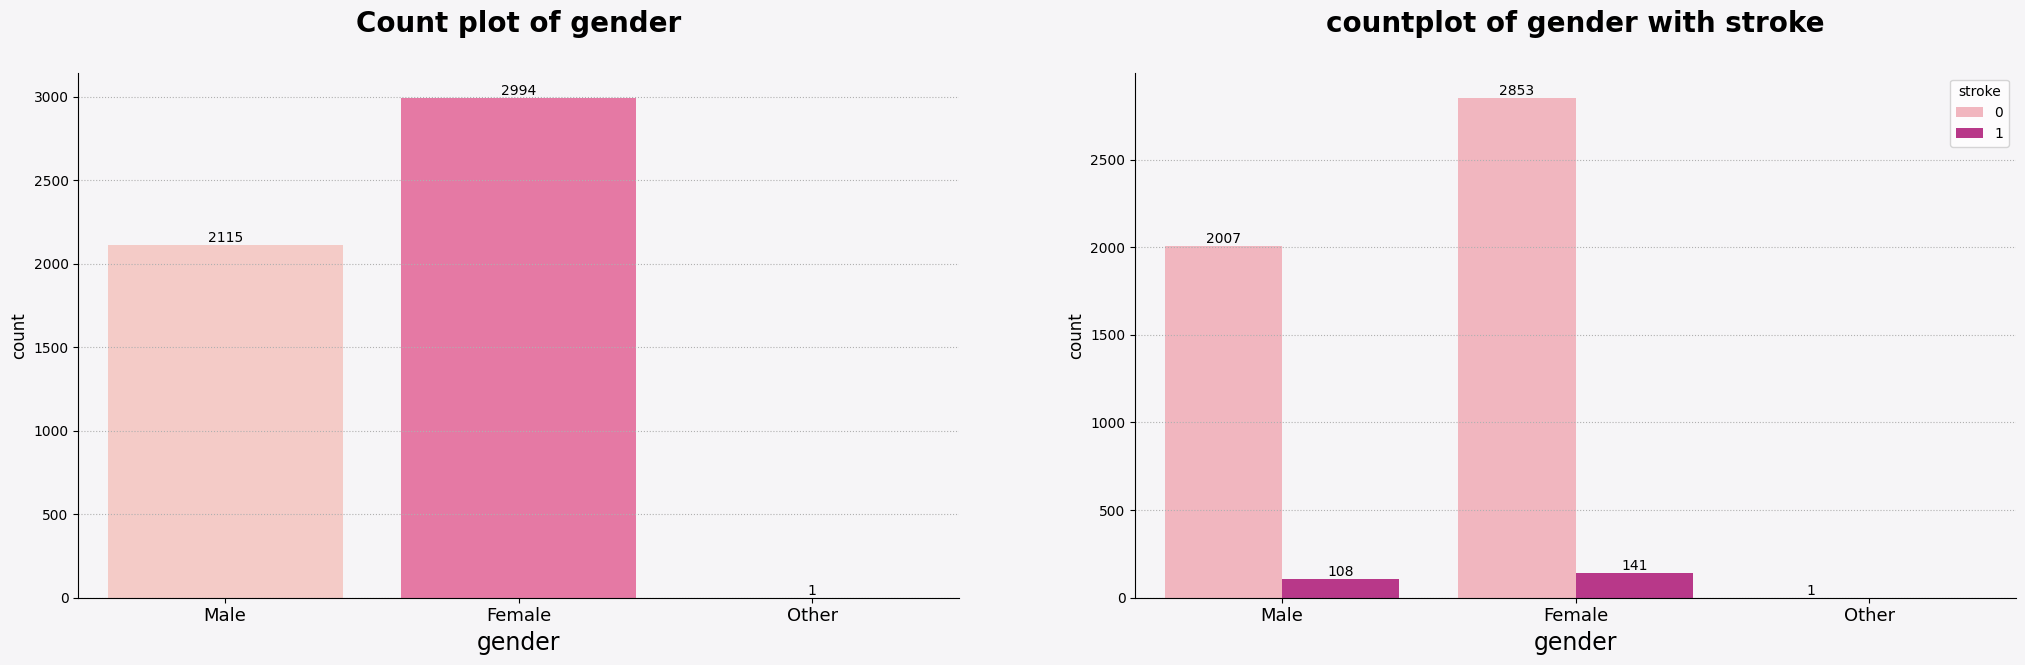

C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\552978326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df, x=i,palette='RdPu')


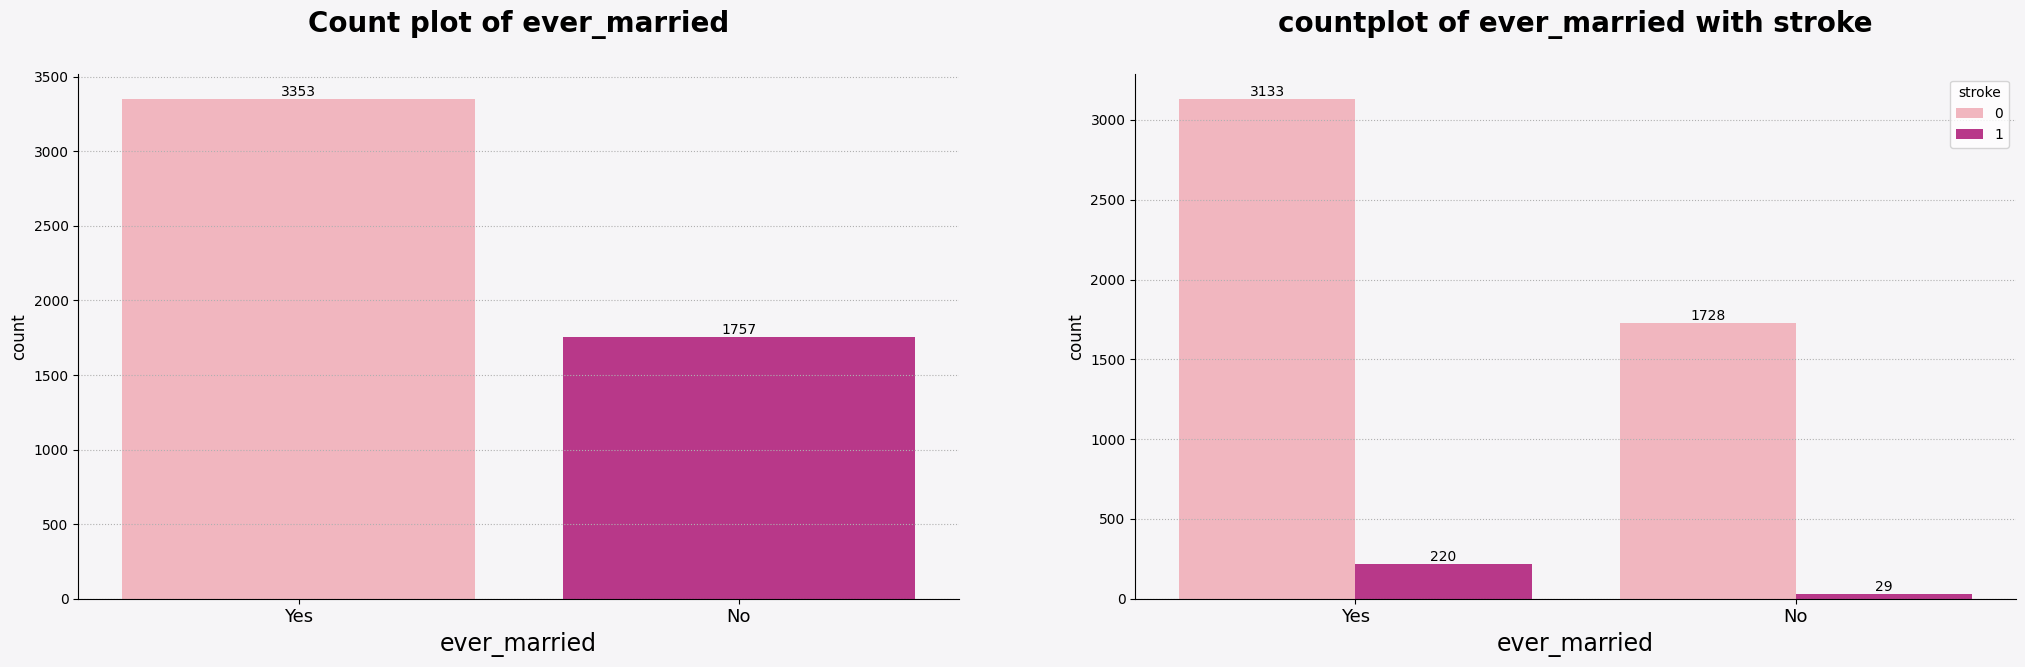

C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\552978326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df, x=i,palette='RdPu')


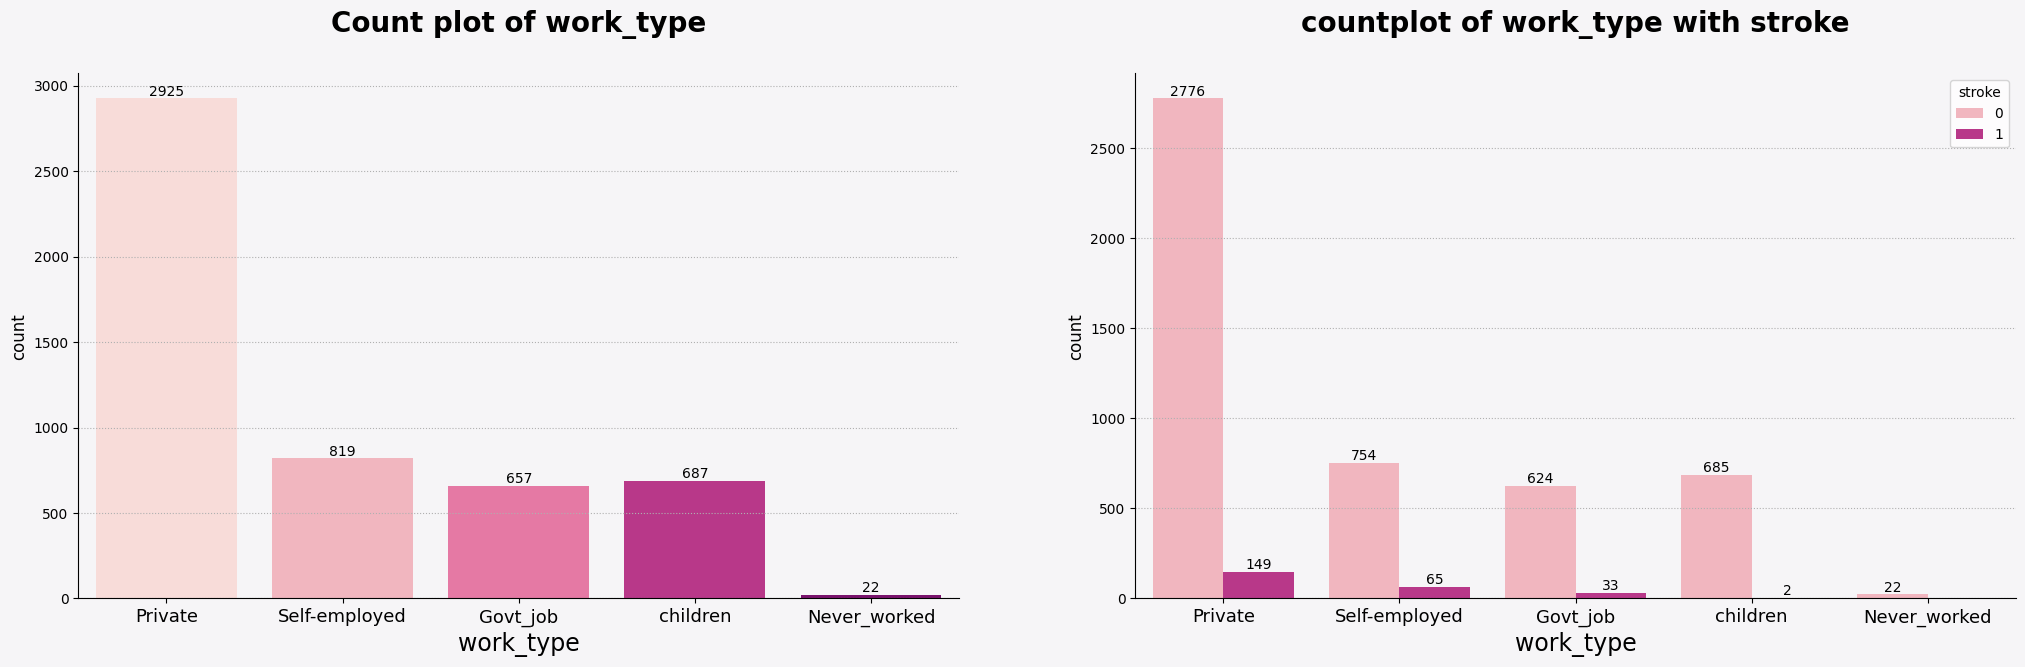

C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\552978326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df, x=i,palette='RdPu')


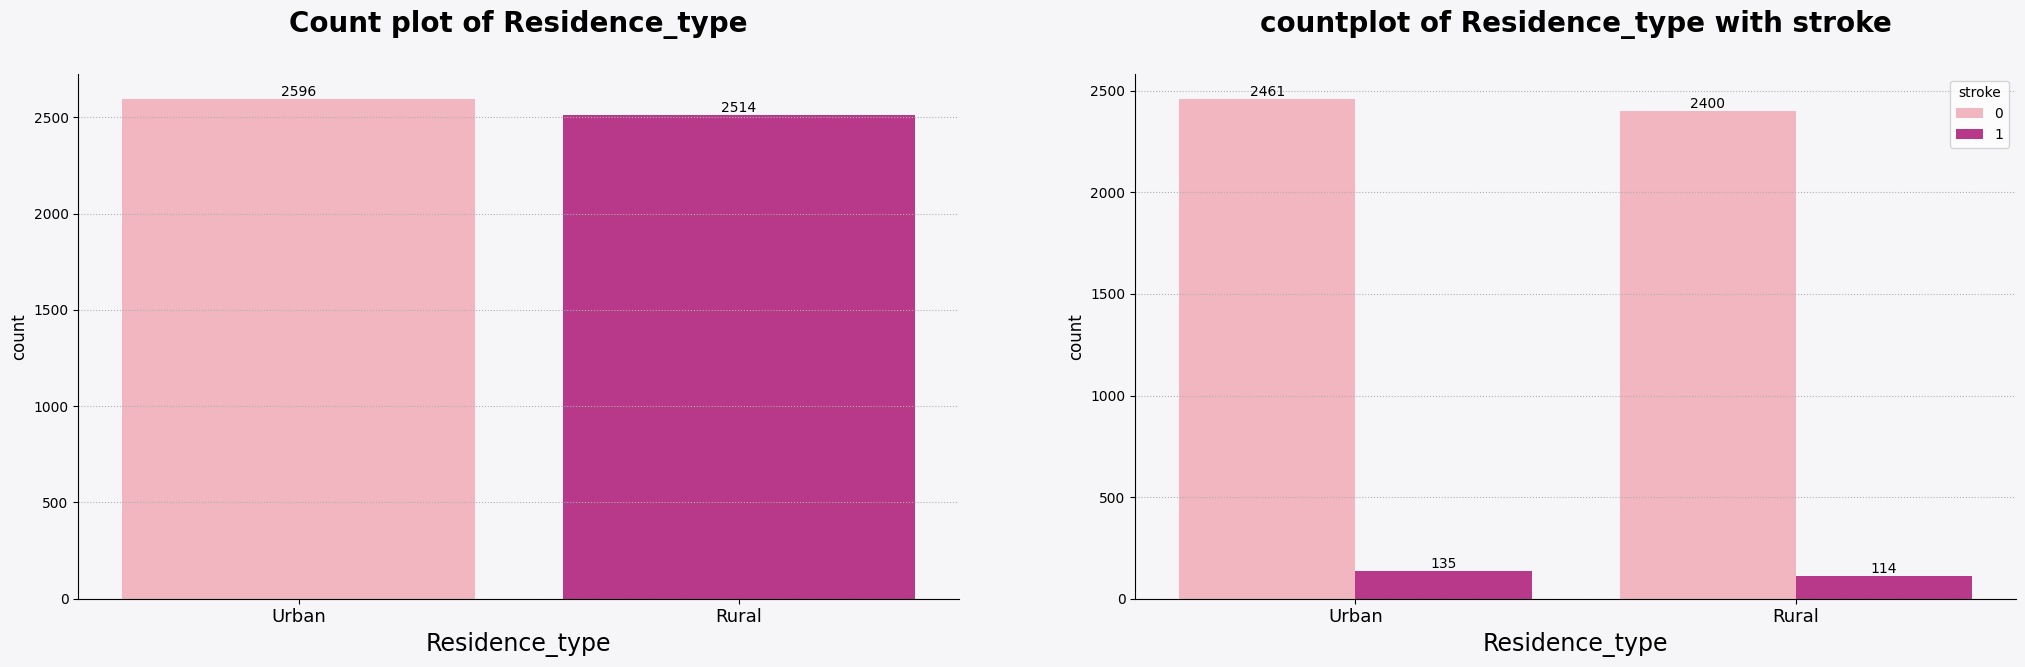

C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\552978326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df, x=i,palette='RdPu')


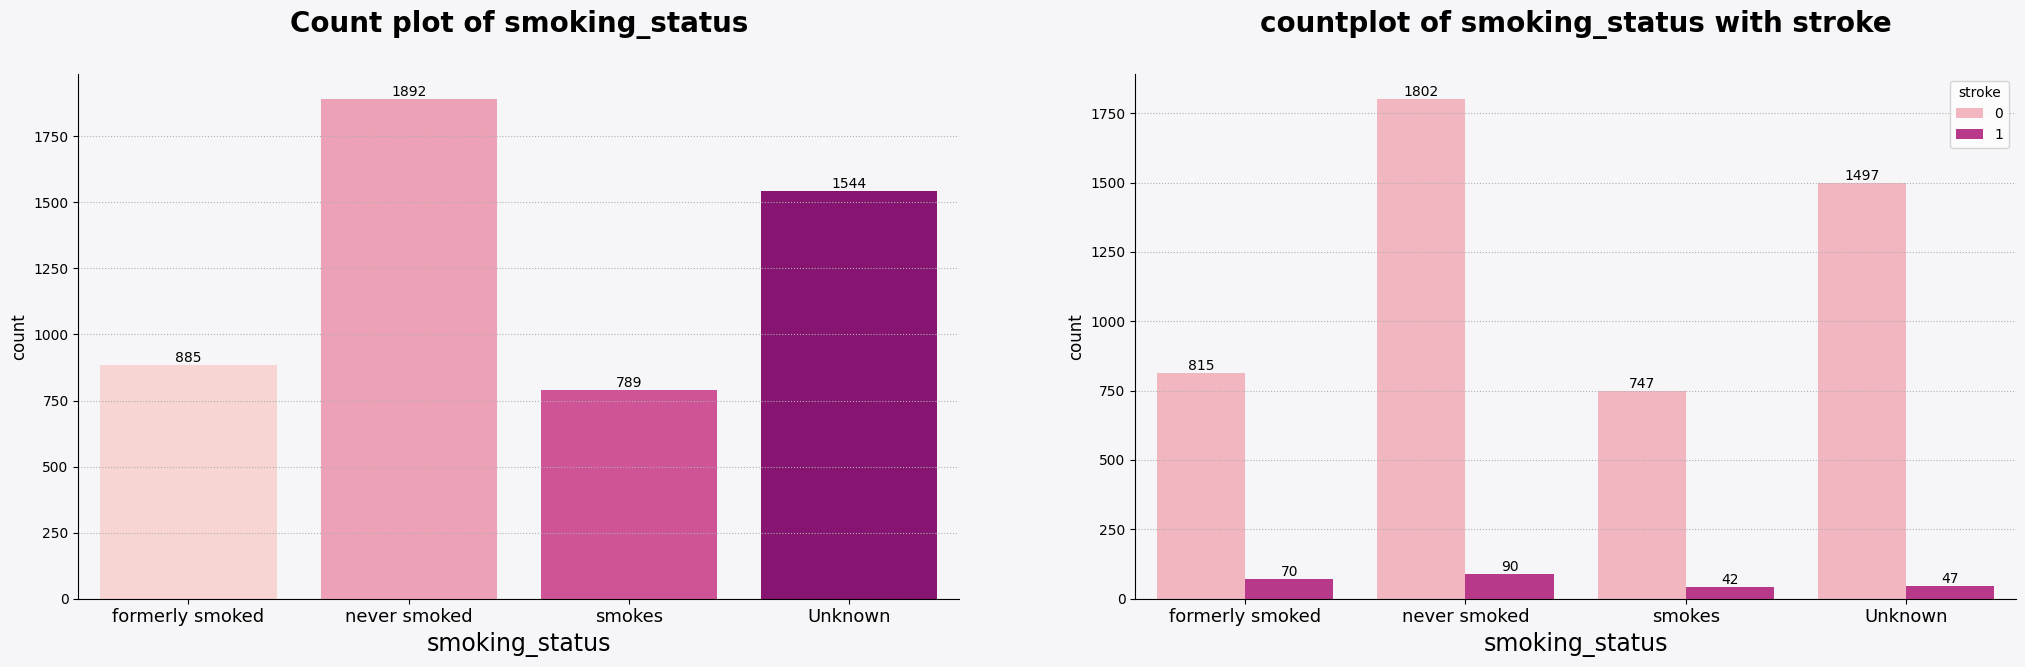

In [13]:
for i in df.columns:
    if df[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=sns.countplot(data=df, x=i,palette='RdPu')
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
        
    
    
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=sns.countplot(data=df,x=i,hue="stroke",palette='RdPu')
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6220\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

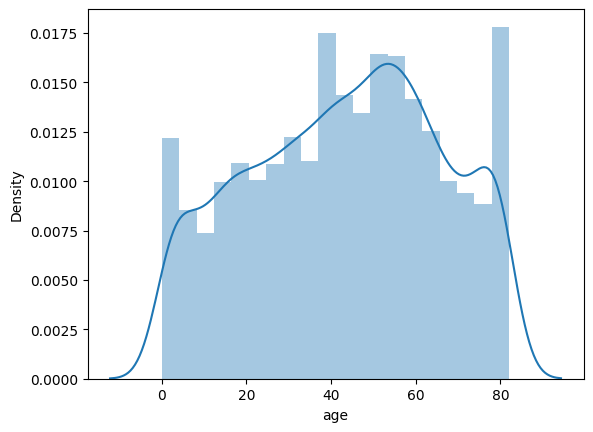

In [14]:
sns.distplot(df['age'])

In [15]:
# Định nghĩa các khoảng tuổi và nhãn tương ứng
age_bins = [0, 15, 65, float('inf')]
age_labels = ['Nhóm trẻ em và thiếu niên', 'Nhóm người trưởng thành', 'Nhóm người cao tuổi']


# Sử dụng hàm cut để phân loại dữ liệu age
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Nhóm người cao tuổi,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,Nhóm người trưởng thành,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,Nhóm người cao tuổi,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,Nhóm người trưởng thành,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,Nhóm người cao tuổi,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,Nhóm người cao tuổi,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,Nhóm người cao tuổi,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,Nhóm người trưởng thành,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,Nhóm người trưởng thành,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [16]:
# Định nghĩa các khoảng BMI và nhãn tương ứng
bins_bmi = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels_bmi = [
    'Nhẹ cân',
    'Cân nặng bình thường',
    'Thừa cân',
    'Béo phì độ I',
    'Béo phì độ II',
    'Béo phì độ III'
]
# Sử dụng hàm cut để phân loại dữ liệu BMI
df['bmi'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Nhóm người cao tuổi,0,1,Yes,Private,Urban,228.69,Béo phì độ II,formerly smoked,1
1,Female,Nhóm người trưởng thành,0,0,Yes,Self-employed,Rural,202.21,Thừa cân,never smoked,1
2,Male,Nhóm người cao tuổi,0,1,Yes,Private,Rural,105.92,Béo phì độ I,never smoked,1
3,Female,Nhóm người trưởng thành,0,0,Yes,Private,Urban,171.23,Béo phì độ I,smokes,1
4,Female,Nhóm người cao tuổi,1,0,Yes,Self-employed,Rural,174.12,Cân nặng bình thường,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,Nhóm người cao tuổi,1,0,Yes,Private,Urban,83.75,Thừa cân,never smoked,0
5106,Female,Nhóm người cao tuổi,0,0,Yes,Self-employed,Urban,125.20,Béo phì độ III,never smoked,0
5107,Female,Nhóm người trưởng thành,0,0,Yes,Self-employed,Rural,82.99,Béo phì độ I,never smoked,0
5108,Male,Nhóm người trưởng thành,0,0,Yes,Private,Rural,166.29,Thừa cân,formerly smoked,0


In [17]:
# Kiểm tra kiểu dữ liệu của cột 'avg_glucose_level'
print(df['avg_glucose_level'].dtype)

float64


In [18]:
# Định nghĩa các khoảng mức độ đường huyết và nhãn tương ứng
blood_sugar_bins = [0, 70, 100, 126, 200, float('inf')]
blood_sugar_labels = [
    'Dưới mức bình thường (Hypoglycemia)',
    'Bình thường',
    'Tiền Đái Tháo Đường',
    'Đái Tháo Đường',
    'Nguy cơ cao'
]

# Sử dụng hàm cut để phân loại dữ liệu đường huyết và gán nhãn
df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins=blood_sugar_bins, labels=blood_sugar_labels, right=False)
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Nhóm người cao tuổi,0,1,Yes,Private,Urban,Nguy cơ cao,Béo phì độ II,formerly smoked,1
1,Female,Nhóm người trưởng thành,0,0,Yes,Self-employed,Rural,Nguy cơ cao,Thừa cân,never smoked,1
2,Male,Nhóm người cao tuổi,0,1,Yes,Private,Rural,Tiền Đái Tháo Đường,Béo phì độ I,never smoked,1
3,Female,Nhóm người trưởng thành,0,0,Yes,Private,Urban,Đái Tháo Đường,Béo phì độ I,smokes,1
4,Female,Nhóm người cao tuổi,1,0,Yes,Self-employed,Rural,Đái Tháo Đường,Cân nặng bình thường,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,Nhóm người cao tuổi,1,0,Yes,Private,Urban,Bình thường,Thừa cân,never smoked,0
5106,Female,Nhóm người cao tuổi,0,0,Yes,Self-employed,Urban,Tiền Đái Tháo Đường,Béo phì độ III,never smoked,0
5107,Female,Nhóm người trưởng thành,0,0,Yes,Self-employed,Rural,Bình thường,Béo phì độ I,never smoked,0
5108,Male,Nhóm người trưởng thành,0,0,Yes,Private,Rural,Đái Tháo Đường,Thừa cân,formerly smoked,0


In [19]:
# Tạo một instance của LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder lên các cột cần thiết
columns_to_encode = ['age','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','avg_glucose_level','bmi']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Hiển thị DataFrame kết quả
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0,0,1,1,2,1,2,1,1,1
1,0,1,0,0,1,3,0,2,5,2,1
2,1,0,0,1,1,2,0,3,0,2,1
3,0,1,0,0,1,2,1,4,0,3,1
4,0,0,1,0,1,3,0,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,1,2,1,0,5,2,0
5106,0,0,0,0,1,3,1,3,2,2,0
5107,0,1,0,0,1,3,0,0,0,2,0
5108,1,1,0,0,1,2,0,4,5,1,0


In [20]:
df_processed = pd.DataFrame(df)
# Lưu DataFrame xuống file CSV
df_processed.to_csv('datasauxuly.csv', index=False)

#### 2.Danh gia chat luong mo hinh

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Load dữ liệu
df = pd.read_csv('datasauxuly.csv')
X = df[['gender', 'age', 'hypertension', 'heart_disease',
                 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Định nghĩa bộ tham số cho GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Tạo đối tượng GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra với mô hình tốt nhất
y_predict = grid.predict(X_test)

# Đánh giá độ chính xác
svc_accuracy = accuracy_score(y_test, y_predict)
svc_precision = precision_score(y_test, y_predict, average='micro')
svc_recall = recall_score(y_test, y_predict, average='micro')
svc_f1 = f1_score(y_test, y_predict, average='micro')

print('Độ chính xác:', svc_accuracy)
print('Độ chính xác Precision:', svc_precision)
print('Độ chính xác Recall:', svc_recall)
print('Độ chính xác F1:', svc_f1)

# Lưu mô hình tốt nhất vào tệp
joblib.dump(grid.best_estimator_, 'svc_best_model.pkl')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

['svc_best_model.pkl']

In [22]:
# Định nghĩa bộ tham số cho GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50), (50,100), (100,200)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Tạo đối tượng GridSearchCV
grid = GridSearchCV(MLPClassifier(), param_grid, refit=True, verbose=2, cv=5)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid.fit(X_train, y_train)

# In ra mô hình tốt nhất
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)
print()

# Dự đoán kết quả trên tập kiểm tra với mô hình tốt nhất
y_predict = grid.predict(X_test)

# Đánh giá độ chính xác
mlp_accuracy = accuracy_score(y_test, y_predict)
mlp_precision = precision_score(y_test, y_predict, average='micro')
mlp_recall = recall_score(y_test, y_predict, average='micro')
mlp_f1 = f1_score(y_test, y_predict, average='micro')

print('Độ chính xác:', mlp_accuracy)
print('Độ chính xác Precision:', mlp_precision)
print('Độ chính xác Recall:', mlp_recall)
print('Độ chính xác F1:', mlp_f1)
joblib.dump(grid.best_estimator_, 'mlp_model.pkl')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   0.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   2.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.8s
[CV]

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   2.5s
[CV] END

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.3s
[CV

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   2.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   2.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   2.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   2.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   2.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   2.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   2.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   2.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   2.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   2.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   2.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   3.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   3.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   3.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   3.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   3.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   3.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.5s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=sgd; total time=   1.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=constant, solver=adam; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.9s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=sgd; total time=   1.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.6s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   4.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=sgd; total time=   3.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.0s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=constant, solver=adam; total time=   4.4s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.1s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=sgd; total time=   4.2s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   4.8s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   4.7s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   4.3s


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   4.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 200), learning_rate=adaptive, solver=adam; total time=   3.6s
Best parameters found by GridSearchCV:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

Độ chính xác: 0.949119373776908
Độ chính xác Precision: 0.949119373776908
Độ chính xác Recall: 0.949119373776908
Độ chính xác F1: 0.949119373776908


['mlp_model.pkl']

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Định nghĩa bộ tham số cho GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7]
}

# Tạo đối tượng GridSearchCV
grid = GridSearchCV(XGBClassifier(), param_grid, refit=True, verbose=2, cv=5)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid.fit(X_train, y_train)

# In ra mô hình tốt nhất
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)
print()

# Dự đoán kết quả trên tập kiểm tra với mô hình tốt nhất
y_predict = grid.predict(X_test)

# Đánh giá độ chính xác
xgb_accuracy = accuracy_score(y_test, y_predict)
xgb_precision = precision_score(y_test, y_predict, average='micro')
xgb_recall = recall_score(y_test, y_predict, average='micro')
xgb_f1 = f1_score(y_test, y_predict, average='micro')

print('Độ chính xác:', xgb_accuracy)
print('Độ chính xác Precision:', xgb_precision)
print('Độ chính xác Recall:', xgb_recall)
print('Độ chính xác F1:', xgb_f1)

# Lưu mô hình tốt nhất vào tệp
joblib.dump(grid.best_estimator_, 'xgb_best_model.pkl')



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [96]:
# Định nghĩa bộ tham số cho GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Tạo đối tượng GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=2, cv=5)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid.fit(X_train, y_train)

# In ra mô hình tốt nhất
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)
print()

# Dự đoán kết quả trên tập kiểm tra với mô hình tốt nhất
y_predict = grid.predict(X_test)

# Đánh giá độ chính xác
dt_accuracy = accuracy_score(y_test, y_predict)
dt_precision = precision_score(y_test, y_predict, average='micro')
dt_recall = recall_score(y_test, y_predict, average='micro')
dt_f1 = f1_score(y_test, y_predict, average='micro')

print('Độ chính xác:', dt_accuracy)
print('Độ chính xác Precision:', dt_precision)
print('Độ chính xác Recall:', dt_recall)
print('Độ chính xác F1:', dt_f1)

# Lưu mô hình tốt nhất vào tệp
joblib.dump(grid.best_estimator_, 'dt_best_model.pkl')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, 

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
df = pd.read_csv('datasauxuly.csv')
X = df[['gender', 'age', 'hypertension', 'heart_disease',
                 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# Định nghĩa bộ tham số cho GridSearchCV
param_grid = {
    'n_estimators': [100, 200 ],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Tạo đối tượng GridSearchCV
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, verbose=2, cv=5)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid.fit(X_train, y_train)

# In ra mô hình tốt nhất
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)
print()

# Dự đoán kết quả trên tập kiểm tra với mô hình tốt nhất
y_predict = grid.predict(X_test)

# Đánh giá độ chính xác
gb_accuracy = accuracy_score(y_test, y_predict)
gb_precision = precision_score(y_test, y_predict, average='micro')
gb_recall = recall_score(y_test, y_predict, average='micro')
gb_f1 = f1_score(y_test, y_predict, average='micro')

print('Độ chính xác:', gb_accuracy)
print('Độ chính xác Precision:', gb_precision)
print('Độ chính xác Recall:', gb_recall)
print('Độ chính xác F1:', gb_f1)

# Lưu mô hình tốt nhất vào tệp
joblib.dump(grid.best_estimator_, 'gb_best_model.pkl')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

['gb_best_model.pkl']